# customer dataset 전처리 및 시각화 
## 미국 주별 좋은 영화 구독자수 비율을 folium으로 시각화

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
customer=pd.read_csv('movie_customer_cleaned.csv')
customer.head()

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,last_down_date,down_flag
0,C5001,F,NC,51,50s,M,N,2014,Y,2015,12-23-2014,1
1,C5002,M,CA,23,20s,S,N,2014,N,.,10-25-2016,1
2,C5003,F,TX,39,30s,M,N,2014,N,.,12-21-2018,1
3,C5004,F,TX,69,60s+,M,N,2014,N,.,12-30-2014,1
4,C5005,F,SC,60,60s+,M,N,2014,N,.,12-09-2018,1


In [56]:
len(customer['state'].value_counts()) # 총 고객이 갖고있는 state수 

36

In [0]:
customer['state'].value_counts()

In [0]:
state_us=customer['state'].value_counts()

df_state=pd.DataFrame({'state':state_us.index,
                       'count':state_us.values})
print(df_state.shape)
print(df_state['state'].to_list())
pp_usa=pd.read_csv('us_population.csv')

merged_data=pd.merge(df_state,pp_usa,how='inner',on='state')
merged_data['population']=merged_data.population.str.replace(',','').astype(int)

merged_data['rate_subscription']=merged_data['count']/merged_data['population']
merged_data=merged_data.drop(['state_name','Unnamed: 3','count','population'],axis=1)
merged_data.tail()

In [24]:
merged_data['population'].dtype

dtype('int64')

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
import folium

In [0]:
import json 
geo='us-states.json'
geo_str=json.load(open(geo))
geo_str

In [53]:
map=folium.Map(location=[40,-98],zoom_start=4)
map.choropleth(geo_data=geo_str,data=merged_data,
               columns=['state','rate_subscription'],key_on='id',fill_color='YlOrRd',legend_name='The count of states')
map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# download 데이터셋 불러오기

In [0]:
# download 데이터셋 불러오기
download=pd.read_csv('movie_download.csv')
download.head()

,customer_id,item_id,down_year,down_date,weekday
0,C5001,I-1010,2014,02-21-2014,6
1,C5001,I-1014,2014,04-04-2014,6
2,C5001,I-1017,2014,01-19-2014,1
3,C5001,I-1028,2014,01-21-2014,3
4,C5001,I-1035,2014,03-11-2014,3


## 파생변수생성 - 다운로드 건수 by customer_id

In [0]:
# (파생변수생성) customer_id별 다운로드 건수 
down_cnt=download['customer_id'].value_counts()
download_count=pd.DataFrame({'customer_id':down_cnt.index,
                             'download_cnt':down_cnt}).sort_index()
download_count=download_count.reset_index()
download_count.drop('index',axis=1,inplace=True)
download_count

In [0]:
# 생성한 파생변수를 customer 데이터셋에 merge하기 
merged_customer=pd.merge(customer,download_count,on=['customer_id'],how='left')
# download_cnt의 NaN값을 0으로 채워주기
merged_customer['download_cnt']=merged_customer['download_cnt'].fillna(0)
# download_cnt의 데이터형식을 float->int로 변경
merged_customer['download_cnt']=merged_customer['download_cnt'].map(lambda x : '%.f'%x)
merged_customer.head()

,customer_id,gender,state,age,age_group,married,kids_under12,register_year,drop_flag,drop_year,download_cnt
0,C5001,F,NC,51,50s,M,N,2014,Y,2015,11
1,C5002,M,CA,23,20s,S,N,2014,N,.,23
2,C5003,F,TX,39,30s,M,N,2014,N,.,50
3,C5004,F,TX,69,60s+,M,N,2014,N,.,40
4,C5005,F,SC,60,60s+,M,N,2014,N,.,38


Text(0.5, 1.0, 'The rate of Kid_under12')

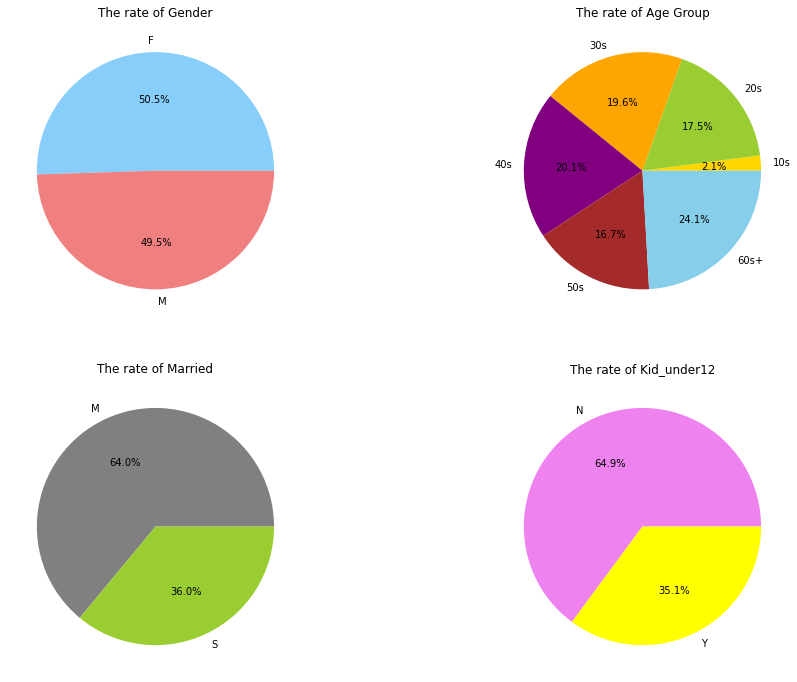

In [0]:
# gender, age_group, married, kids_under12 pie chart로 시각화하기 
%matplotlib inline
plt.figure(figsize=(16,12))
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)

gender=merged_customer.groupby(['gender']).size()
labels=['F','M']
colors=['lightskyblue','lightcoral']
ax1.pie(gender,autopct="%.1f%%",labels=labels,colors=colors)
ax1.set_title('The rate of Gender')
ax1.set_facecolor('grey')

age_group=merged_customer.groupby(['age_group']).size()
colors=['gold','yellowgreen','orange','purple','brown','skyblue']
labels=['10s','20s','30s','40s','50s','60s+']
ax2.pie(age_group,autopct="%.1f%%",colors=colors,labels=labels)
ax2.set_title('The rate of Age Group')

married=merged_customer.groupby(['married']).size()
colors=['grey','yellowgreen']
labels=['M','S']
ax3.pie(married,autopct="%.1f%%",colors=colors,labels=labels)
ax3.set_title('The rate of Married')

kid_under12=merged_customer.groupby(['kids_under12']).size()
colors=['violet','yellow']
labels=['N','Y']
ax4.pie(kid_under12,autopct="%.1f%%",colors=colors,labels=labels)
ax4.set_title('The rate of Kid_under12')

Text(0.5, 1.0, 'download_cnt by gender')

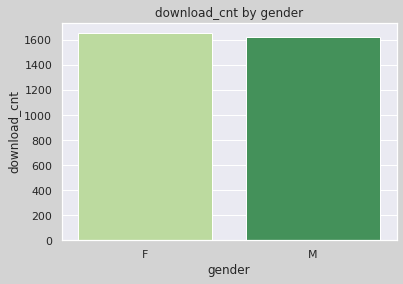

In [0]:
# 성별에 따른 다운로드 건수 막대그래프로 시각화하기 
sns.set(rc={'figure.facecolor':'lightgrey'})
grouped=merged_customer['download_cnt'].groupby(merged_customer['gender']).size()
sns.barplot(x=grouped.index,y=grouped,palette='YlGn',)
plt.title('download_cnt by gender')

In [0]:
# 년도별 등록 건수와 이탈 건수 데이터프레임 생성 및 시각화 
register_cnt=merged_customer['register_year'].value_counts()
register_cnt=pd.DataFrame(register_cnt)
drop_cnt=pd.DataFrame(merged_customer['drop_year'].value_counts())
drop_cnt=drop_cnt.iloc[[1,2,3,4],:]
drop_cnt.loc['2014']=0
drop_cnt.sort_index()
drop_cnt.index=drop_cnt.index.astype('int64')
# 년도별 등록 건수와 이탈건수 concat으로 병합
concated_cnt=pd.concat([register_cnt,drop_cnt],axis=1)
concated_cnt

In [0]:
# 누적 이탈자 수와 누적 이탈 비율 데이터프레임 생성 및 시각화 
drop_cumcnt=np.cumsum(concated_cnt['drop_year'])
register_cumcnt=np.cumsum(concated_cnt['register_year'])
percent_cumcnt=((drop_cumcnt/register_cumcnt)*100).round(1)
concated_cnt['register_cumcnt']=register_cumcnt
concated_cnt['drop_cumcnt']=drop_cumcnt
concated_cnt['percent_cumcnt']=percent_cumcnt
concated_cnt

,register_year,drop_year,register_cumcnt,drop_cumcnt,percent_cumcnt
2014,1017,0,1017,0,0.0
2015,728,130,1745,130,7.4
2016,662,143,2407,273,11.3
2017,861,189,3268,462,14.1
2018,9,197,3277,659,20.1


Text(0.5, 1.0, 'The cummulative number and percentage of customer dropped')

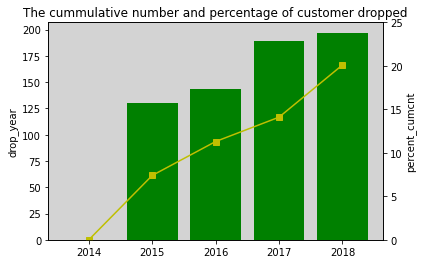

In [0]:
plt.rcParams['axes.facecolor']='lightgrey'
plt.bar(x=concated_cnt.index,height=concated_cnt['drop_year'],color='green')
plt.ylabel('drop_year')
plt.twinx()
plt.plot(concated_cnt['percent_cumcnt'],'ys-')
plt.ylabel('percent_cumcnt')
plt.ylim(0,25)
plt.title('The cummulative number and percentage of customer dropped')

In [0]:
# 나이그룹에 따른 다운로드 건수 시각화 
df=merged_customer.copy()

In [0]:
download_cnt_by_age=df['download_cnt'].astype('int').groupby(df['age_group']).sum()
age_group_size=sorted(df['age_group'].value_counts())
x=sorted(df['age_group'].unique())

In [0]:
import plotly.express as px
df=merged_customer
fig=px.scatter(df,x=x,
               y=download_cnt_by_age,
               color=df['age_group'].unique(),
               size=age_group_size,
               title='The sum of download count by age group with size of age group')
fig.update_layout(autosize=False,
                  width=600,
                  height=400,
                  margin=dict(
                      l=50,r=50,b=100,t=100,pad=4
                  ),
                  paper_bgcolor='LightSteelBlue')
fig.show()